In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
from keras.models import load_model
import cv2
import numpy as np


In [16]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode


def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

Saved to photo.jpg


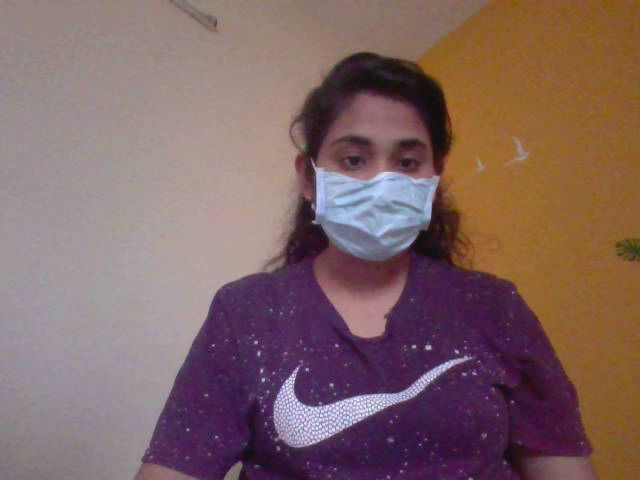

In [18]:
from IPython.display import Image

model = load_model('/content/drive/My Drive/FaceMask Detect/model.h5')
face_clsfr=cv2.CascadeClassifier('/content/drive/My Drive/FaceMask Detect/haarcascade_frontalface_default.xml')

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

labels_dict={0:'with_mask',1:'without_mask'}
color_dict={0:(0,255,0),1:(0,0,255)}

In [19]:
from google.colab.patches import cv2_imshow

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0   244k      0 --:--:-- --:--:-- --:--:--  244k


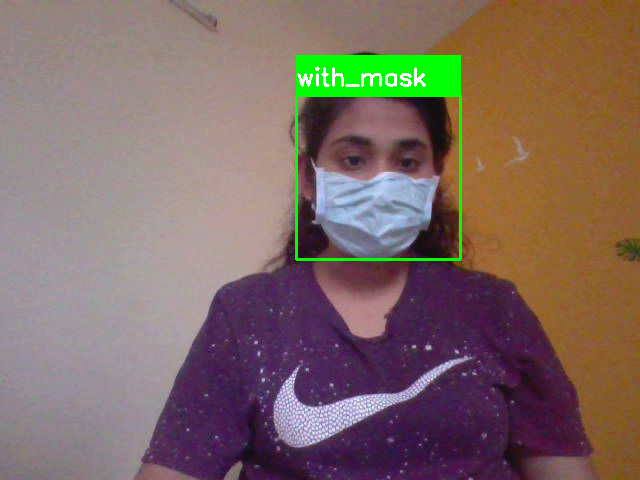

In [20]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=face_clsfr.detectMultiScale(gray,1.3,5)  
  
for x,y,w,h in faces:
  face_img=gray[y:y+w,x:x+w]
  resized=cv2.resize(face_img,(100,100))
  normalized=resized/255.0
  reshaped=np.reshape(normalized,(1,100,100,1))
  result=model.predict(reshaped)
  label=np.argmax(result,axis=1)[0]
  cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
  cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
  cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

cv2_imshow(img)
key=cv2.waitKey(1)

<IPython.core.display.Javascript object>

Saved to photo.jpg


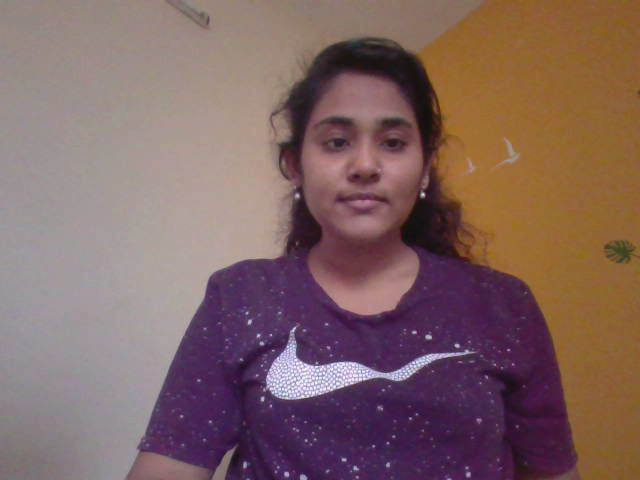

In [21]:
from IPython.display import Image

model = load_model('/content/drive/My Drive/FaceMask Detect/model.h5')
face_clsfr=cv2.CascadeClassifier('/content/drive/My Drive/FaceMask Detect/haarcascade_frontalface_default.xml')

try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

labels_dict={0:'with_mask',1:'without_mask'}
color_dict={0:(0,255,0),1:(0,0,255)}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5500  100  5500    0     0   233k      0 --:--:-- --:--:-- --:--:--  233k


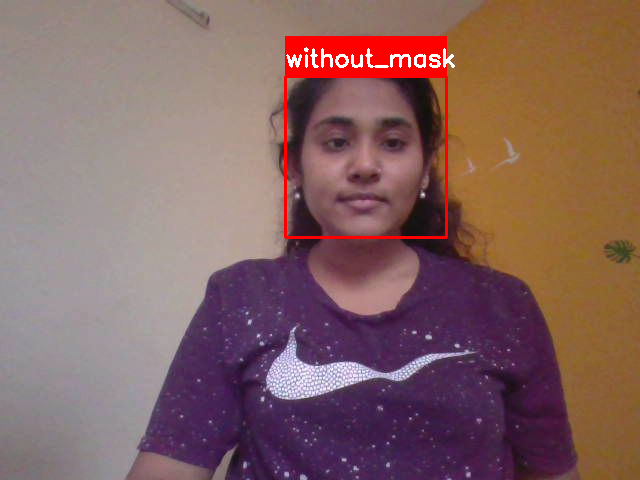

In [22]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
img = cv2.imread('photo.jpg', cv2.IMREAD_UNCHANGED)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces=face_clsfr.detectMultiScale(gray,1.3,5)  
  
for x,y,w,h in faces:
  face_img=gray[y:y+w,x:x+w]
  resized=cv2.resize(face_img,(100,100))
  normalized=resized/255.0
  reshaped=np.reshape(normalized,(1,100,100,1))
  result=model.predict(reshaped)
  label=np.argmax(result,axis=1)[0]
  cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
  cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
  cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)

cv2_imshow(img)
key=cv2.waitKey(1)